In [2]:

# from google.colab import drive
# drive.mount('/content/drive')

# wd_url = '/content/drive/MyDrive/' 
# import sys
# sys.path.append(wd_url)

import numpy as np
import modin.pandas as pd
from pandas import read_excel 
import os
from copy import deepcopy

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
print(tf.__version__)
from tensorflow.python.client import device_lib

from ipywidgets import *
from IPython.display import SVG
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


from plottools import plotEIC1

#!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

%matplotlib inline

2021-08-26 16:25:13.374828: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


2.5.0


In [10]:
#fname = '/content/drive/MyDrive/expdata/eic.xlsx'
#fname = '../expdata/eic.xlsx'
fname = '../data/test/new/-R0max0.29-R1max0.53-R2max0.48-eic.csv'
#data=pd.read_excel(fname,index_col=0)
data = pd.read_csv(fname,index_col=None)
data.pT.max()
data.keys()
print(data.head())
test_features = deepcopy(data)
test_features = test_features.drop(columns=['W2', 'hadron', 'target'])

             W2        pT   Q2         x    z hadron  target  partonicaff  \
0  16236.767392  0.100000  1.0  0.000062  0.1    pi+  proton       0.3249   
1  16236.767392  0.193611  1.0  0.000062  0.1    pi+  proton       0.3264   
2  16236.767392  0.374852  1.0  0.000062  0.1    pi+  proton       0.3302   
3  16236.767392  0.725756  1.0  0.000062  0.1    pi+  proton       0.3346   
4  16236.767392  1.405143  1.0  0.000062  0.1    pi+  proton       0.3185   

   currentaff  tmdaff  ...  R0max  R1max  R2max         qT        xN   zN  \
0      0.9991  0.0193  ...   0.29   0.53   0.48   1.000000  0.000062  0.1   
1      0.9982  0.0000  ...   0.29   0.53   0.48   1.936110  0.000062  0.1   
2      0.9994  0.0000  ...   0.29   0.53   0.48   3.748523  0.000062  0.1   
3      0.9992  0.0000  ...   0.29   0.53   0.48   7.257554  0.000062  0.1   
4      0.9987  0.0000  ...   0.29   0.53   0.48  14.051419  0.000062  0.1   

         yp        yh        yi        yf  
0  9.758121  0.540562  7.25995

In [3]:
model_name = 'DNN_looped_V7_trial1_100Epoch'
local_model_path = '../models/'
colab_model_path = '/content/drive/MyDrive/models/'
model = tf.keras.models.load_model(local_model_path+model_name)

2021-08-26 14:46:41.826024: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-08-26 14:46:41.894579: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-08-26 14:46:41.894617: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-08-26 14:46:41.898093: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-26 14:46:41.898141: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-08-26 14:46:41.899263: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.

interactive(children=(FloatSlider(value=0.1, description='R0max', max=1.0, min=0.1, step=0.01), FloatSlider(va…

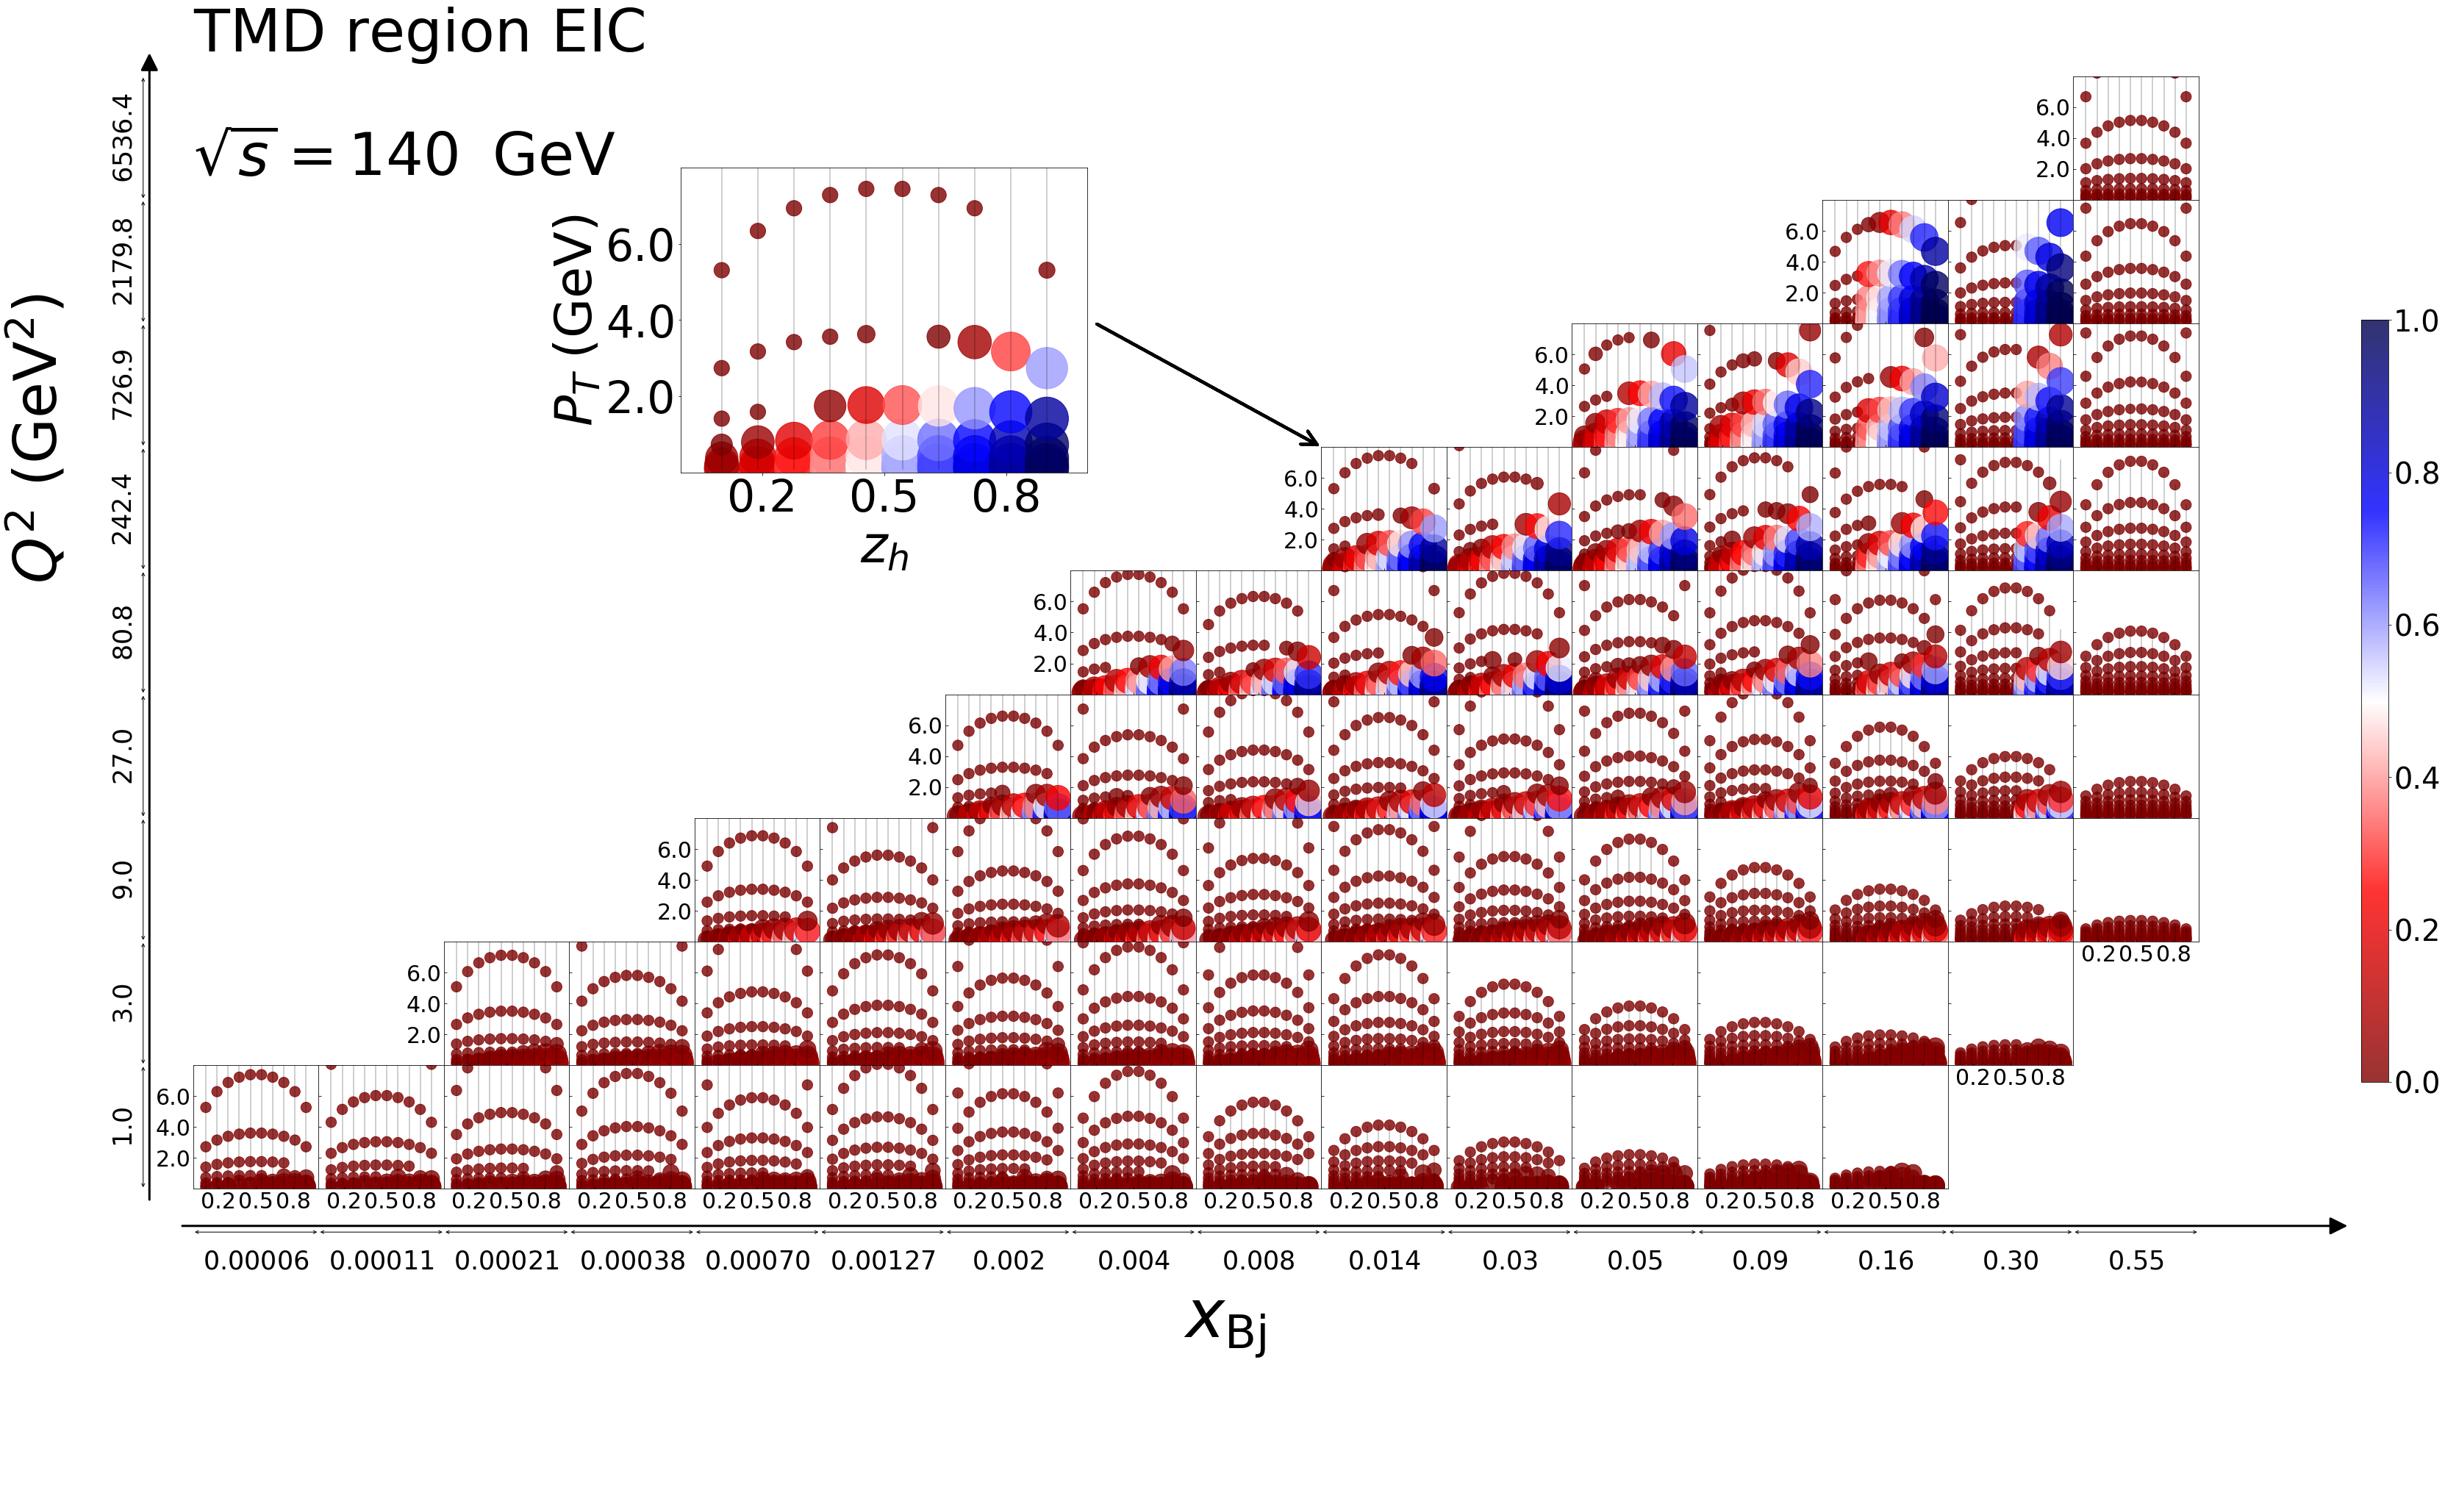

In [4]:
# Create a slider widget for interactive Rmax selection
R0max_Slider=widgets.FloatSlider(min=.1,max=1.,step=.01)
R1max_Slider=widgets.FloatSlider(min=.1,max=1.,step=.01)
R2max_Slider=widgets.FloatSlider(min=.1,max=1.,step=.01)

# Define a function to load the .svg file that corresponds the widgets Rmax value

def plot(R0max=R0max_Slider,R1max=R1max_Slider,R2max=R2max_Slider):
   # interactive-R0max0.1-R1max0.1-R2max0.1-eic.svg
    test_features['R0max'] = np.ones(len(test_features))*R0max_Slider.value
    test_features['R1max'] = np.ones(len(test_features))*R1max_Slider.value
    test_features['R2max'] = np.ones(len(test_features))*R2max_Slider.value
    data['tmdaff'] = model.predict(test_features).flatten()
    #print(data.head())
    #print(affinity)
    return(plotEIC1(data, hadron = 'pi+', affinity = 'tmdaff', plotx = 'pT', ploty = 'z', cmap_name = 'seismic_r', yscale = 'linear'))

#Initiate user interaction with loadSVG functoin and Rmax widget
widgets.interact(plot, R0max=R0max_Slider,R1max=R1max_Slider,R2max=R2max_Slider);

No handles with labels found to put in legend.


             W2        pT   Q2         x    z hadron  target  partonicaff  \
0  16236.767392  0.100000  1.0  0.000062  0.1    pi+  proton       0.3249   
1  16236.767392  0.193611  1.0  0.000062  0.1    pi+  proton       0.3264   
2  16236.767392  0.374852  1.0  0.000062  0.1    pi+  proton       0.3302   
3  16236.767392  0.725756  1.0  0.000062  0.1    pi+  proton       0.3346   
4  16236.767392  1.405143  1.0  0.000062  0.1    pi+  proton       0.3185   

   currentaff  tmdaff  ...  R2max         qT        xN   zN        yp  \
0      0.9991  0.0193  ...   0.48   1.000000  0.000062  0.1  9.758121   
1      0.9982  0.0000  ...   0.48   1.936110  0.000062  0.1  9.758121   
2      0.9994  0.0000  ...   0.48   3.748523  0.000062  0.1  9.758121   
3      0.9992  0.0000  ...   0.48   7.257554  0.000062  0.1  9.758121   
4      0.9987  0.0000  ...   0.48  14.051419  0.000062  0.1  9.758121   

         yh        yi        yf    Q  had  
0  0.540562  7.259959  0.313265  1.0  pi+  
1  0.86992

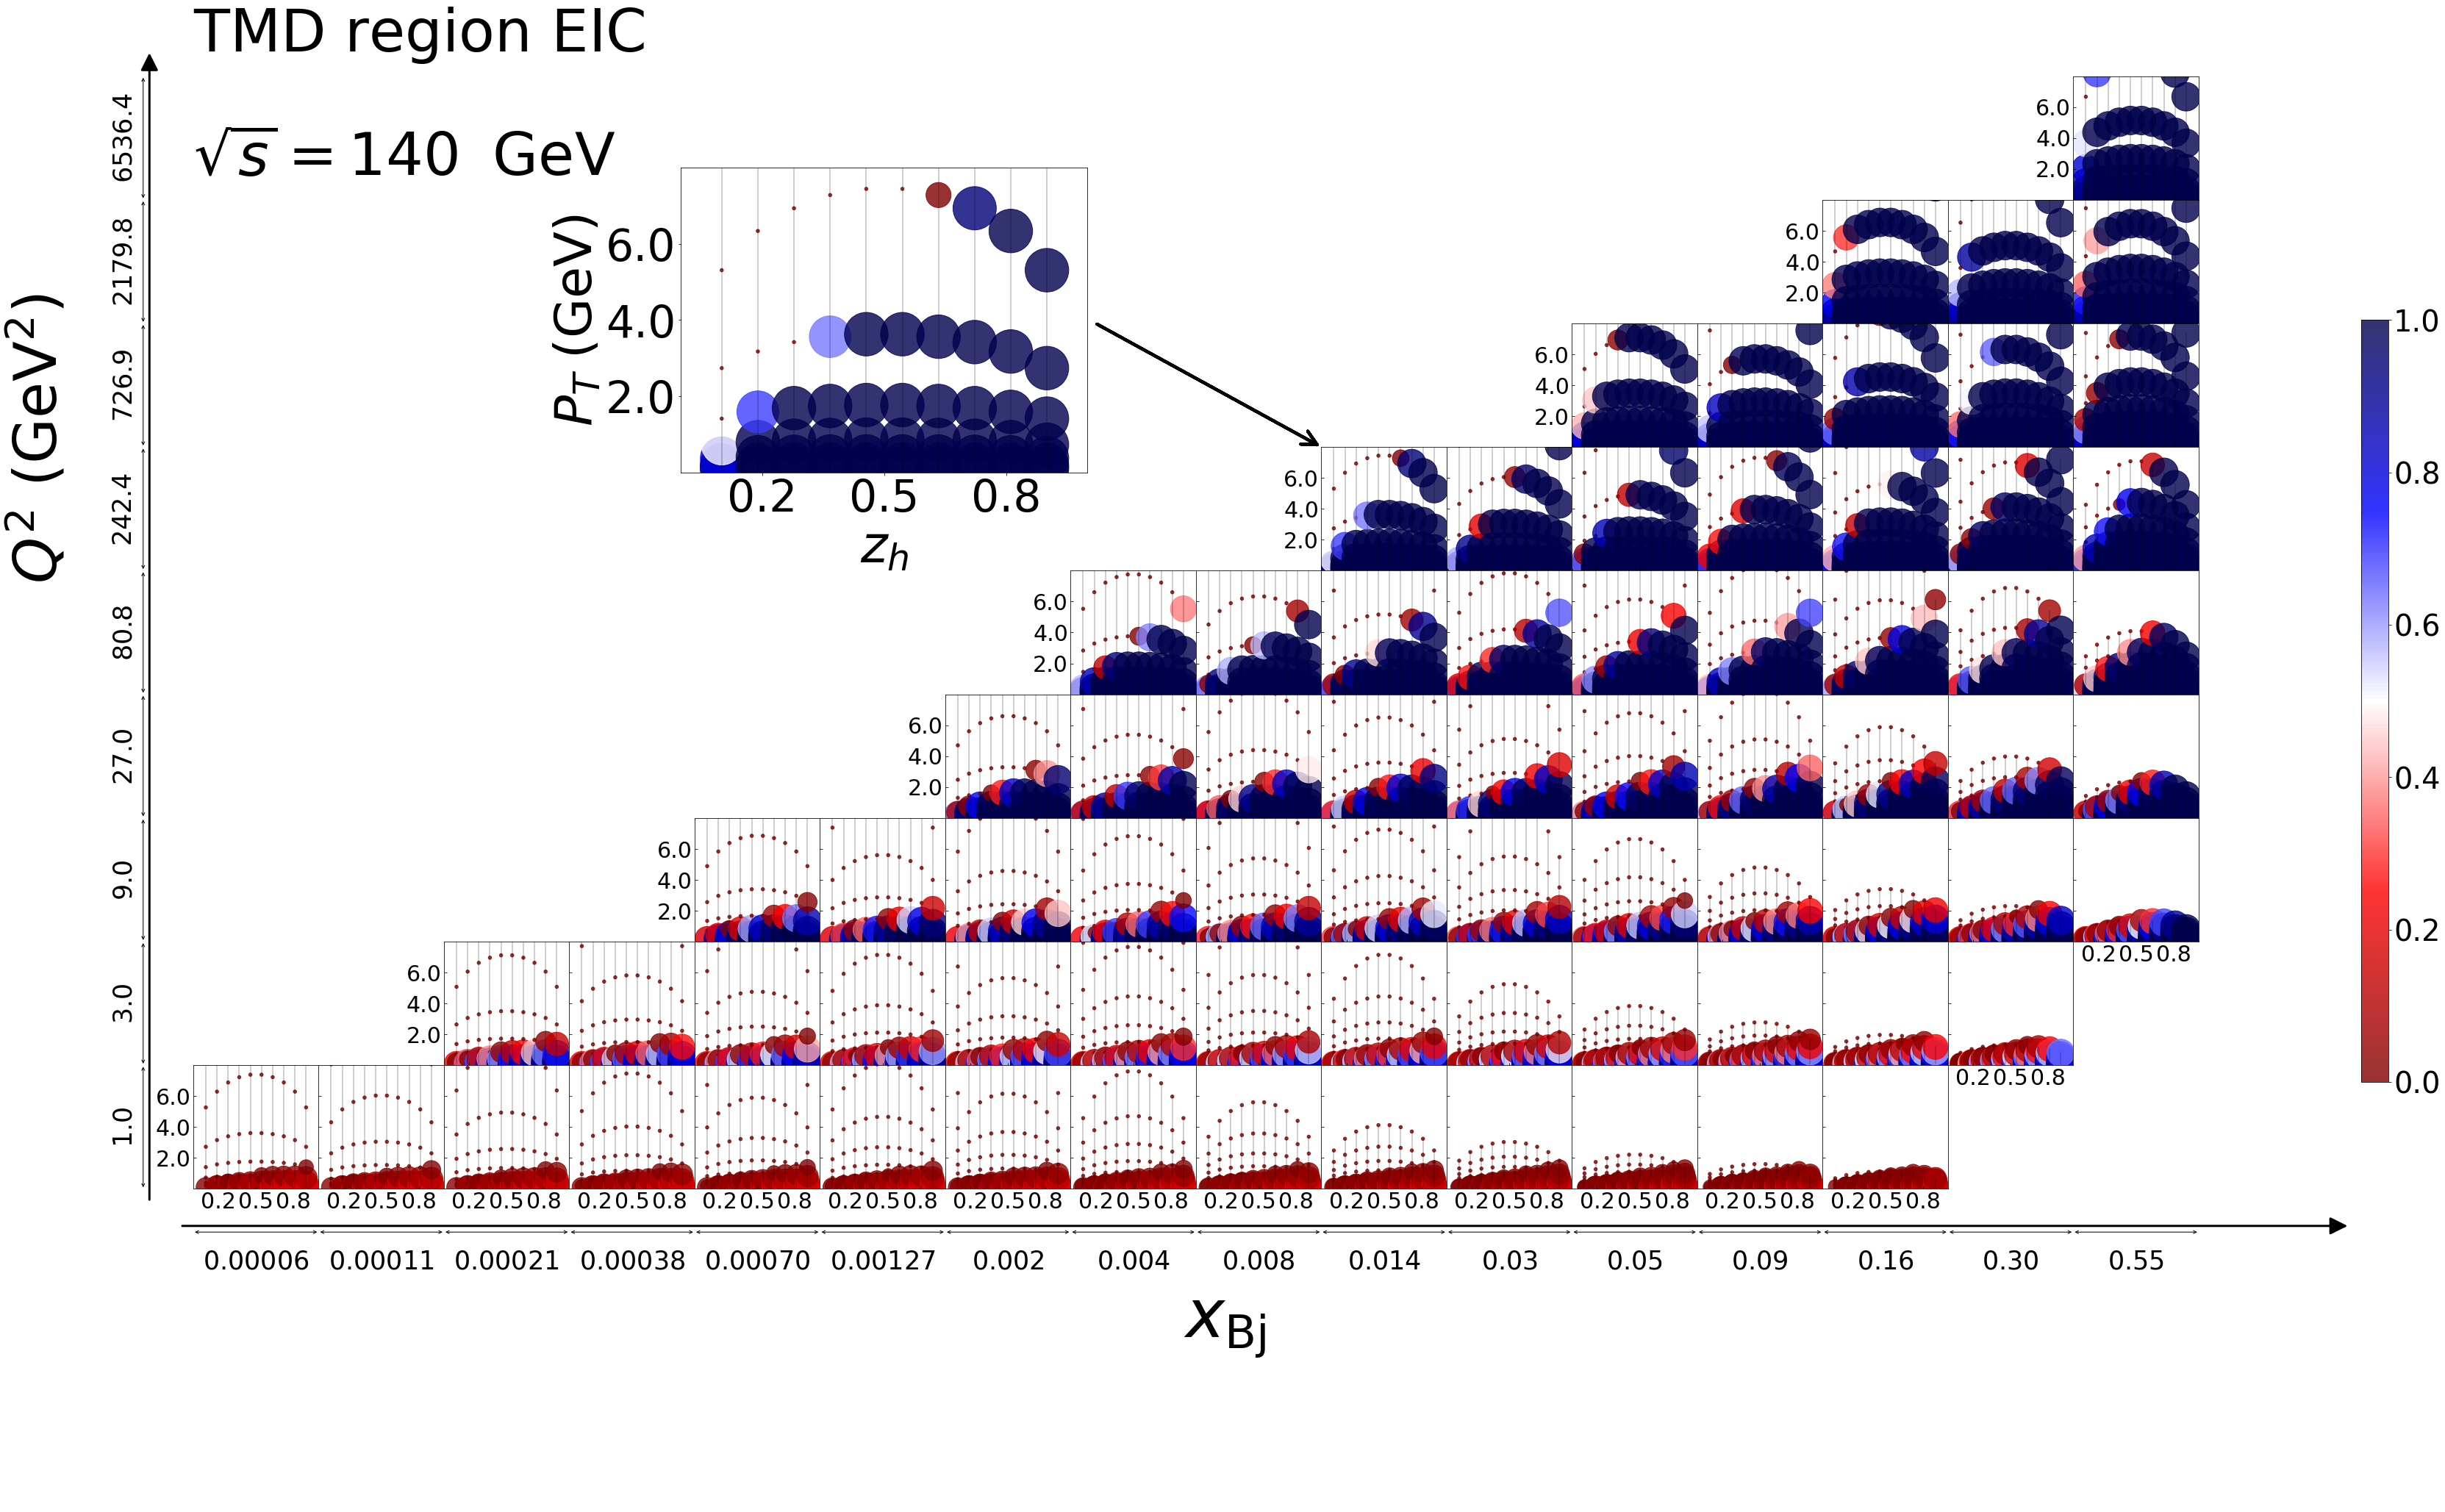

In [11]:
plotEIC1(data, hadron = 'pi+', affinity = 'tmdaff', plotx = 'pT', ploty = 'z', cmap_name = 'seismic_r', yscale = 'linear')